# Data Analaysis for Character Recognition Tool

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/baldw225/Documents/GitHub/CRT_Validity/scripts'

In [4]:
df = pd.read_excel('Github_Output_Data.xlsx', sheet_name='Combined_Long_with_Removals')
df.head()

,Show,Time,Character,Gender,Ethnicity,Computer,Computer %,Human_J,Human_R,Referee_Human,False Positive,False Negative
0,CEG,:01-:15,Alex,M,Asian,0,0.000000,0,0,0,no,no
1,CEG,:15-:30,Alex,M,Asian,1,0.073333,0,0,0,yes,no
2,CEG,:31-:45,Alex,M,Asian,0,0.000000,0,0,0,no,no
3,CEG,:46-1:00,Alex,M,Asian,1,0.055556,0,0,0,yes,no
4,CEG,1:01-1:15,Alex,M,Asian,0,0.000000,0,0,0,no,no


In [5]:
shows = pd.unique(df['Show']).tolist()
shows

['CEG', 'Q', 'ST', 'BL', 'TF', 'TM']

In [6]:
genders = pd.unique(df['Gender']).tolist()
genders

['M', 'F']

In [7]:
ethnicities = pd.unique(df['Ethnicity']).tolist()
ethnicities

['Asian', 'White', 'Other', 'Black']

In [8]:
current_show_df = df[df['Show'] == shows[1]]
current_show_df.head()

,Show,Time,Character,Gender,Ethnicity,Computer,Computer %,Human_J,Human_R,Referee_Human,False Positive,False Negative
520,Q,:01-:15,Alex_Parrish,F,Other,1,0.562222,1,1,1,no,no
521,Q,:15-:30,Alex_Parrish,F,Other,1,0.153333,1,1,1,no,no
522,Q,:31-:45,Alex_Parrish,F,Other,1,0.268889,1,1,1,no,no
523,Q,:46-1:00,Alex_Parrish,F,Other,1,0.402222,1,1,1,no,no
524,Q,1:01-1:15,Alex_Parrish,F,Other,1,0.128889,1,1,1,no,no


In [9]:
y      = df['Computer %'].values
y_pred = df['Referee_Human'].values
np.corrcoef(y, y_pred)

array([[1.       , 0.6857476],
       [0.6857476, 1.       ]])

In [11]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_pred, y)
roc_auc = auc(fpr, tpr)
roc_auc

0.9280937357225343

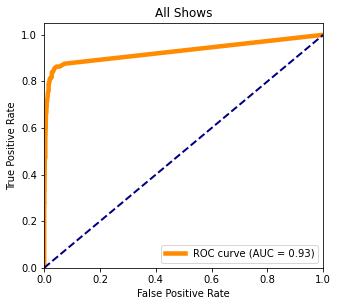

In [12]:
plt.figure(figsize = (5,4.5))
lw = 4.5
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Shows')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
from math import sqrt


N1 = df.shape[0]
N2 = N1
Q0 = roc_auc*(1-roc_auc)
Q1 = roc_auc/(2-roc_auc)-roc_auc**2
Q2 = 2*roc_auc**2/(1+roc_auc)- roc_auc**2
SE = sqrt((Q0+(N1+1)*Q1+(N2-1)*Q2)/(N1*N2))
lower_bound = roc_auc-1.959964*SE
upper_bound = roc_auc+1.959964*SE
display(roc_auc, SE, lower_bound, upper_bound)

0.9280937357225343

0.0038738448579229688

0.9205011392594201

0.9356863321856485

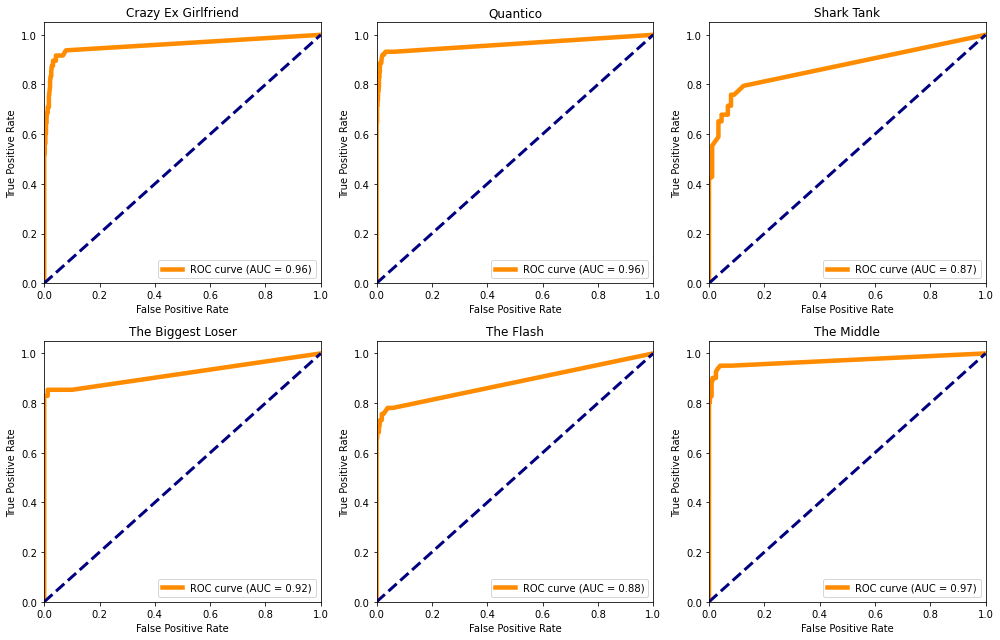

In [14]:
plt.figure(figsize = (14,9))

shownames = ['Crazy Ex Girlfriend', 
             'Quantico', 
             'Shark Tank', 
             'The Biggest Loser', 
             'The Flash', 
             'The Middle']

for curr_show in range(len(shows)):

    current_show_df = df[df['Show'] == shows[curr_show]]
    characters = pd.unique(current_show_df['Character']).tolist()
    
    
    #
    y      = current_show_df['Computer %'].values
    y_pred = current_show_df['Referee_Human'].values
    np.corrcoef(y, y_pred)

    # compute ROC
    fpr, tpr, _ = roc_curve(y_pred, y)
    roc_auc = auc(fpr, tpr)
    roc_auc

    # Plot
    lw = 4.5
    plt.subplot(2,3,curr_show+1)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(shownames[curr_show])
    plt.legend(loc="lower right")
    plt.tight_layout()
plt.show()

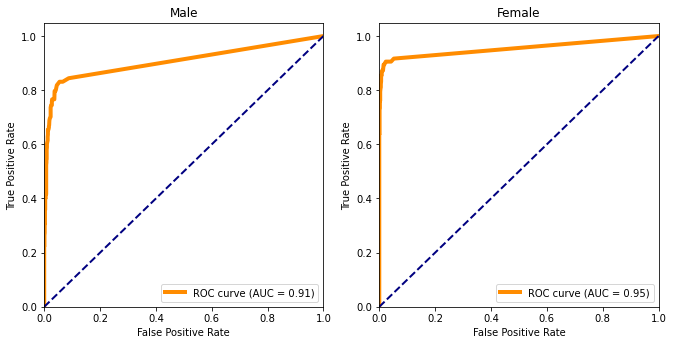

In [15]:
plt.figure(figsize = (14,9))

gendernames = ['Male', 'Female']

for curr_gender in range(len(genders)):

    current_gender_df = df[df['Gender'] == genders[curr_gender]]
    characters = pd.unique(current_gender_df['Character']).tolist()
    
    
    #
    y      = current_gender_df['Computer %'].values
    y_pred = current_gender_df['Referee_Human'].values
    np.corrcoef(y, y_pred)

    # compute ROC
    fpr, tpr, _ = roc_curve(y_pred, y)
    roc_auc = auc(fpr, tpr)
    roc_auc

    # Plot
    lw = 4
    plt.subplot(2,3,curr_gender+1)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(gendernames[curr_gender])
    plt.legend(loc="lower right")
    plt.tight_layout()
plt.show()

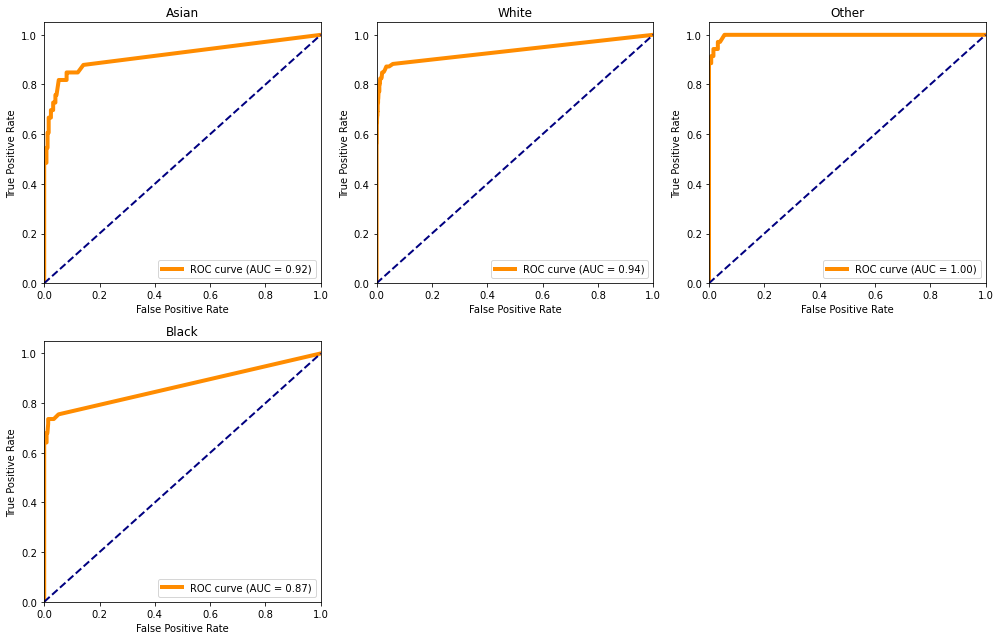

In [16]:
plt.figure(figsize = (14,9))

ethnicitynames = ['Asian', 'White', 'Other', 'Black']

for curr_ethnicity in range(len(ethnicities)):

    current_ethnicity_df = df[df['Ethnicity'] == ethnicities[curr_ethnicity]]
    characters = pd.unique(current_ethnicity_df['Character']).tolist()
    
    
    #
    y      = current_ethnicity_df['Computer %'].values
    y_pred = current_ethnicity_df['Referee_Human'].values
    np.corrcoef(y, y_pred)

    # compute ROC
    fpr, tpr, _ = roc_curve(y_pred, y)
    roc_auc = auc(fpr, tpr)
    roc_auc

    # Plot
    lw = 4
    plt.subplot(2,3,curr_ethnicity+1)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(ethnicitynames[curr_ethnicity])
    plt.legend(loc="lower right")
    plt.tight_layout()
plt.show()